# Introduction

The company "Crankshaft List" has hundreds of free vehicle advertisements that are published on its website every day.

This project is a study of data from the last few years and determination of the factors that influence the price of a vehicle.

This study is to analyze the correlations of vehicle prices in relation to conditions, mileage, number of cylinders and their age.

## Start

In this first step we are loading the libraries that will be used in this data analysis in Python.

In [1]:
# Loading the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



### Loading data

Loading the file with the data.

In [2]:
# Loading the file with the data to be worked on
car_sale = pd.read_csv('vehicles_us.csv')
  
    

### Exploration of the initial data

The dataset contains the following fields:
- `price` - price
- `model_year` - model year
- `model` - model
- `condition` - condition
- `cylinders` - cylinders
- `fuel` - gasoline, diesel, etc.
- `odometer` - the vehicle's mileage when the ad was published
- `transmission` - transmission
- `paint_color` - color
- `is_4wd` - Whether the vehicle is a 4x4 (Boolean type)
- `date_posted` - the date the ad was published
- `days_listed` - days from publication to removal

In [3]:
# Analyzing the general/summary information of the data
car_sale.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# printing a sample of the data
display(car_sale.head(10))


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


There are a total of 51525 lines of information in 13 columns.
Among these 13 columns, the following columns are missing values:
- `model_year` - model year
- `cylinders` - cylinders
- `odometer` - the vehicle's mileage when the ad was published
- `paint_color` - color
- `is_4wd` - Whether the vehicle is a 4x4 (Boolean type)

In [5]:
# Checking the data types of each piece of information
print(car_sale.dtypes)

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object


There are columns with inconsistent data types in relation to their information, they are:
- as float: `model_year` and `is_4wd`;
- as object/string: `date_posted`.

In addition to these, there may be other inconsistencies, which will be investigated, in the `cylinders` and `odometer` columns, which are also float.

In [6]:
# Checking the number of missing values ​​per column
print(car_sale.isna().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


We have the following missing values ​​per column:
- 3619 missing values ​​in `model_year` - model year
- 5260 missing values ​​in `cylinders` - cylinders
- 7892 missing values ​​in `odometer` - the vehicle's mileage when the ad was published
- 9267 missing values ​​in `paint_color` - color
- 25953 missing values ​​in `is_4wd` - whether the vehicle is a 4x4 (Boolean type)

### Conclusions and next steps

We have a DataFrame with 51525 rows and 13 columns. In some of these, there are missing values ​​and/or with inappropriate data types with the information contained.

The data types will be changed to the appropriate ones for the column and the missing values ​​will be investigated to define actions such as:
- whether they will be filled
- with what information they will be filled
- or whether some rows will be deleted.

This is to ensure more appropriate data for the necessary analyses.

## Handling missing values

Investigating information and missing values ​​from the `model_year` column.

In [7]:
# Investigating the information in the 'model_year' column
print(car_sale[['model_year', 'model']].head(25))
print()

# Replacing missing values ​​with the median of each model
car_sale['model_year'] = car_sale.groupby('model')['model_year'].transform(lambda x: x.fillna(x.median()))

# Checking
print(car_sale[['model_year', 'model']].head(25))

    model_year                     model
0       2011.0                    bmw x5
1          NaN                ford f-150
2       2013.0            hyundai sonata
3       2003.0                ford f-150
4       2017.0              chrysler 200
5       2014.0              chrysler 300
6       2015.0              toyota camry
7       2013.0               honda pilot
8       2012.0               kia sorento
9       2008.0               honda pilot
10      2011.0  chevrolet silverado 1500
11      2012.0              honda accord
12      2012.0                  ram 1500
13      2018.0            hyundai sonata
14      2009.0                 gmc yukon
15      2013.0                  ram 1500
16      2010.0                  ram 1500
17      2014.0             jeep cherokee
18      2013.0        chevrolet traverse
19      2018.0           hyundai elantra
20         NaN           chevrolet tahoe
21      2007.0               toyota rav4
22      2004.0       chevrolet silverado
23      2004.0  

After investigation, the missing values ​​of vehicle years in the `model_year` column were replaced by the median of each model.

Investigating information and missing values ​​from the `odometer` column.

In [8]:
# Investigating the information in the 'odometer' column
print(car_sale[['condition', 'odometer']].head(25))
print()

# Replacing missing values ​​with the median of each vehicle condition
car_sale['odometer'] = car_sale.groupby('condition')['odometer'].transform(lambda x: x.fillna(x.median()))

# Checking
print(car_sale[['condition', 'odometer']].head(25))

    condition  odometer
0        good  145000.0
1        good   88705.0
2    like new  110000.0
3        fair       NaN
4   excellent   80903.0
5   excellent   57954.0
6   excellent   79212.0
7   excellent  109473.0
8   excellent  104174.0
9   excellent  147191.0
10  excellent  128413.0
11  excellent  111142.0
12  excellent  140742.0
13  excellent   22104.0
14  excellent  132285.0
15  excellent       NaN
16  excellent  130725.0
17  excellent  100669.0
18  excellent  128325.0
19  excellent   31932.0
20  excellent  147485.0
21       good  154000.0
22   like new  180000.0
23       good       NaN
24  excellent       NaN

    condition  odometer
0        good  145000.0
1        good   88705.0
2    like new  110000.0
3        fair  181613.0
4   excellent   80903.0
5   excellent   57954.0
6   excellent   79212.0
7   excellent  109473.0
8   excellent  104174.0
9   excellent  147191.0
10  excellent  128413.0
11  excellent  111142.0
12  excellent  140742.0
13  excellent   22104.0
14  excellent  

After investigation, the missing vehicle mileage values ​​from the `odometer` column were replaced by the median of the observed conditions.

Investigating information and missing values ​​from the `cylinders` column.

In [9]:
# Investigating the information in the 'cylinders' column
print(car_sale[['cylinders', 'model']].head(25))
print()

# Replacing missing values ​​with the median of each model
car_sale['cylinders'] = car_sale.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.median()))

# Checking
print(car_sale[['cylinders', 'model']].head(25))

    cylinders                     model
0         6.0                    bmw x5
1         6.0                ford f-150
2         4.0            hyundai sonata
3         8.0                ford f-150
4         4.0              chrysler 200
5         6.0              chrysler 300
6         4.0              toyota camry
7         6.0               honda pilot
8         4.0               kia sorento
9         NaN               honda pilot
10        8.0  chevrolet silverado 1500
11        4.0              honda accord
12        8.0                  ram 1500
13        4.0            hyundai sonata
14        8.0                 gmc yukon
15        8.0                  ram 1500
16        8.0                  ram 1500
17        6.0             jeep cherokee
18        6.0        chevrolet traverse
19        4.0           hyundai elantra
20        8.0           chevrolet tahoe
21        6.0               toyota rav4
22        8.0       chevrolet silverado
23        6.0             jeep wrangler


After investigation, the missing cylinder capacity values ​​in the `cylinders` column were replaced by the average of each model.

Investigating information and missing values ​​from the `paint_color` column.

In [10]:
# Investigating the information in the 'paint_color' column
display(car_sale.loc[car_sale['paint_color'].isna()])
print()
print(car_sale['paint_color'].sort_values().unique())
print()
print(car_sale['paint_color'].value_counts().head(60))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,104230.0,automatic,coupe,NaN,NaN,2018-11-24,89



['black' 'blue' 'brown' 'custom' 'green' 'grey' 'orange' 'purple' 'red'
 'silver' 'white' 'yellow' nan]

paint_color
white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64


After investigating the data in the `paint_color` column, any missing values ​​will be replaced by unknown.

In [11]:
# Replacing missing values ​​with unknown
car_sale['paint_color'] = car_sale['paint_color'].fillna('unknown')

# Checking if missing values ​​have been replaced
print(car_sale['paint_color'].sort_values().unique())
print()
display(car_sale.head(10))
print()
car_sale.info()

['black' 'blue' 'brown' 'custom' 'green' 'grey' 'orange' 'purple' 'red'
 'silver' 'unknown' 'white' 'yellow']



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Investigating information and missing values ​​from the `is_4wd` column.

In [12]:
# Investigating the information in the 'is_4wd' column
display(car_sale.loc[car_sale['is_4wd'].isna()])
print()
print(car_sale['is_4wd'].sort_values().unique())
print()
print(car_sale['is_4wd'].value_counts().head(60))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71



[ 1. nan]

is_4wd
1.0    25572
Name: count, dtype: int64


After analysis, the missing values ​​in the `is_4wd` column will be replaced by '0' (zero), as the values ​​in this column are boolean and the values ​​'1' (one) mean that the vehicle has 4x4 traction and the others are not of this type.

In [13]:
# Replacing missing values ​​with 0 (zero)
car_sale['is_4wd'] = car_sale['is_4wd'].fillna(0)

# Checking if missing values ​​from column 'is_4wd' have been replaced
print(car_sale['is_4wd'].sort_values().unique())
print()
display(car_sale.head(10))
print()
car_sale.info()

[0. 1.]



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## Correction of data types

The data types of the following columns will be adjusted to facilitate the analysis of data/information.
- `model_year` from floating point to integer;
- `cylinders` from floating point to integer;
- `odometer` from floating point to integer;
- `is_4wd` from floating point to integer;
- `date_posted` from object to date.

In [14]:
# Changing floating point data to integer
car_sale['model_year'] = car_sale['model_year'].astype(int)
car_sale['cylinders'] = car_sale['cylinders'].astype(int)
car_sale['odometer'] = car_sale['odometer'].astype(int)
car_sale['is_4wd'] = car_sale['is_4wd'].astype(int)

# Changing object data in date of column 'date_posted'
car_sale['date_posted'] = pd.to_datetime(car_sale['date_posted'], format='%Y-%m-%d')


# Checking
display(car_sale.head())
print()
car_sale.info()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 5.1+ MB


## Data enrichment

The following columns will be added:
- `year` - year the advertisement was posted;
- `month` - month the advertisement was posted;
- `day` - day the advertisement was posted;
- `car_age` - age of the vehicle when the advertisement was published;
- `avg_mileage` - average mileage per year when the advertisement was published.

This information will be used to assist in the necessary analyses, for example, it will be possible to verify the correlation of prices with the age of the cars and with the average mileage per year.

In [15]:
# Adding columns for the year, month and day the advertisement was posted
car_sale['year_posted'] = pd.DatetimeIndex(car_sale['date_posted']).year
car_sale['month_posted'] = pd.DatetimeIndex(car_sale['date_posted']).month
car_sale['day_posted'] = pd.DatetimeIndex(car_sale['date_posted']).day

# Checking
display(car_sale)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2018,6,23
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2018,10,19
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,2,7
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,0,2019-03-22,9,2019,3,22
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2018,10,3
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2018,11,14
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,2018,11,15
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,2018,7,2


In [16]:
# Adding column for vehicle age when ad was posted
car_sale['car_age'] = car_sale['year_posted'] - car_sale['model_year']

# Checking
display(car_sale)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,car_age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2018,6,23,7
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2018,10,19,7
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,2,7,6
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,0,2019-03-22,9,2019,3,22,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2018,10,3,5
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2018,11,14,16
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,2018,11,15,9
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,2018,7,2,5


In [17]:
# Adding column of average mileage per year of vehicle when advertisement was posted
car_sale['avg_mileage'] = car_sale['odometer'] / car_sale['car_age']

# Checking
display(car_sale)
print()
print(car_sale.loc[car_sale['avg_mileage'].isna()])

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,car_age,avg_mileage
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2018,6,23,7,20714.285714
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2018,10,19,7,12672.142857
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,2,7,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,0,2019-03-22,9,2019,3,22,16,11350.812500
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019,4,2,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2018,10,3,5,17627.200000
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2018,11,14,16,11343.750000
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,2018,11,15,9,14222.222222
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,2018,7,2,5,27914.600000



       price  model_year         model  condition  cylinders    fuel  \
17037  45400        2018      ram 3500  excellent          6  diesel   
40489  15900        2018  toyota prius  excellent          4  hybrid   

       odometer transmission       type paint_color  is_4wd date_posted  \
17037         0    automatic     pickup       black       1  2018-12-16   
40489         0    automatic  hatchback        blue       0  2018-07-30   

       days_listed  year_posted  month_posted  day_posted  car_age  \
17037           18         2018            12          16        0   
40489           31         2018             7          30        0   

       avg_mileage  
17037          NaN  
40489          NaN  


It is noted that 2 (two) missing values ​​appeared in the average mileage per year column. This may be due to the car being 0 (zero) kilometers old.

These missing values ​​will be replaced by 0 (zero)

In [18]:
# Replacing missing values ​​of column 'avg_mileage' with 0 (zero)
car_sale['avg_mileage'] = car_sale['avg_mileage'].fillna(0)

# Checking if missing values ​​from column 'avg_mileage' have been replaced
print(car_sale.loc[car_sale['avg_mileage'].isna()])
print()
car_sale.info()

Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed, year_posted, month_posted, day_posted, car_age, avg_mileage]
Index: []

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_po

The values ​​in the `condition` column will be replaced by a numerical scale as follows:
- 'new' = 5
- 'like new' = 4
- 'excellent' = 3
- 'good' = 2
- 'salvage' = 1
- 'fair' = 0

This change is necessary to verify the correlation between the condition of the vehicles and their prices.

In [19]:
# Replacing string values ​​in the `condition` column with a numeric scale

car_sale['condition'] = car_sale['condition'].where(car_sale['condition'] != 'new', 5)
car_sale['condition'] = car_sale['condition'].where(car_sale['condition'] != 'like new', 4)
car_sale['condition'] = car_sale['condition'].where(car_sale['condition'] != 'excellent', 3)
car_sale['condition'] = car_sale['condition'].where(car_sale['condition'] != 'good', 2)
car_sale['condition'] = car_sale['condition'].where(car_sale['condition'] != 'salvage', 1)
car_sale['condition'] = car_sale['condition'].where(car_sale['condition'] != 'fair', 0)

# Changing the data type of the 'condition' column to integer
car_sale['condition'] = car_sale['condition'].astype(int)

# Checking
print(car_sale['condition'].unique())
print()
car_sale.info()

[2 4 0 3 1 5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  year_posted   51525 non-null  int32         
 14  month_posted  51525 non-null  int32         
 15  day_posted    51525 n

## Data Verification

At this point, some checks will be performed to see if the data is cleaner and more suitable for analysis.

In [20]:
# Printing general/summary information about the DataFrame
car_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  year_posted   51525 non-null  int32         
 14  month_posted  51525 non-null  int32         
 15  day_posted    51525 non-null  int32 

In [21]:
# Printing a sample of the data
display(car_sale.head(10))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,car_age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2018,6,23,7,20714.285714
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2018,10,19,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,2,7,6,18333.333333
3,1500,2003,ford f-150,0,8,gas,181613,automatic,pickup,unknown,0,2019-03-22,9,2019,3,22,16,11350.812500
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019,4,2,2,40451.500000
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2018,6,20,4,14488.500000
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,0,2018-12-27,73,2018,12,27,3,26404.000000
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,1,2019-01-07,68,2019,1,7,6,18245.500000
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,unknown,1,2018-07-16,19,2018,7,16,6,17362.333333
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17,2019,2,15,11,13381.000000


## Study of the fundamental parameters

After analyzing the data, after the changes have been made, we will begin studying the information and making decisions so that we can have greater legibility in the analyses.

We will conduct studies of the parameters listed below and we will check the correlation with the price of the vehicle.
- Price
- The age of the vehicle when the advertisement was placed
- Mileage
- Number of cylinders
- Condition

Let's start by analyzing the information regarding vehicle prices.

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

Maximum price: 375000
Minimum price: 1
Average price: 12132.464919941776
Median price: 9000.0


array([[<Axes: title={'center': 'price'}>]], dtype=object)

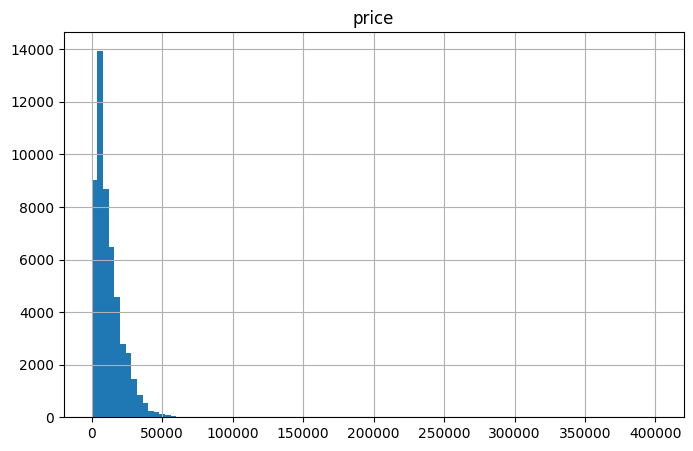

In [22]:
# Price analysis
print(car_sale['price'].describe())
print()
print('Maximum price:', car_sale['price'].max())
print('Minimum price:', car_sale['price'].min())
print('Average price:', car_sale['price'].mean())
print('Median price:', car_sale['price'].median())
car_sale.hist('price', bins=100, range=(0, 400000), figsize=(8,5))



It is observed that the `price` column has many low atypical values. We have cars with a minimum value of 1 and several below 200, 300, 400, which does not make sense, since vehicles are products with high added value.

The high atypical values ​​make some sense, since there are modern cars with high technology and rare cars that reach values ​​well above the average.

That is why we will delve deeper into this analysis to see if information can be excluded or replaced.

count    51525.000000
mean         8.513906
std          6.112976
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: car_age, dtype: float64

Maximum age: 110
Minimum age: 0
Average Age: 8.513905870936439
Median age: 8.0


array([[<Axes: title={'center': 'car_age'}>]], dtype=object)

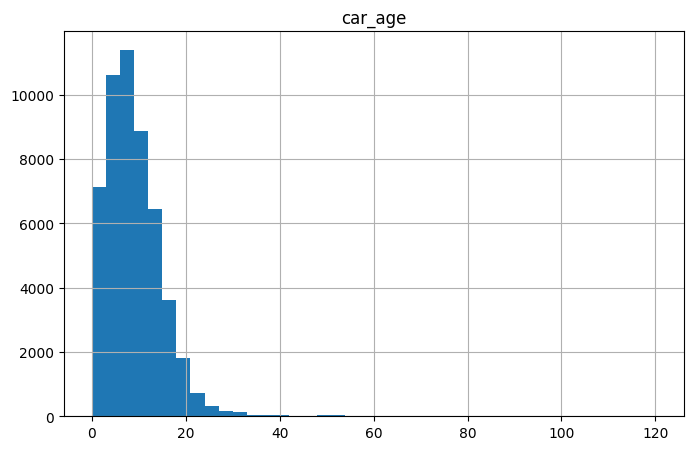

In [23]:
# Analysis of the age of the vehicle when the advertisement was published
print(car_sale['car_age'].describe())
print()
print('Maximum age:', car_sale['car_age'].max())
print('Minimum age:', car_sale['car_age'].min())
print('Average Age:', car_sale['car_age'].mean())
print('Median age:', car_sale['car_age'].median())
car_sale.hist('car_age', bins=40, range=(0, 120), figsize=(8,5))


It is observed that the `price` column has values ​​from '0' (zero) to '110' (one hundred and ten) years of age at the time of publication of the advertisement.

This data is plausible, even with the average of 8.56 and the median of 7.0, since newly manufactured cars and old cars have a market for sale.

count     51525.000000
mean     115199.007278
std       60484.868232
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64

Maximum mileage: 990000
Minimum mileage: 0
Average mileage: 115199.00727802038
Average mileage: 110908.0


array([[<Axes: title={'center': 'odometer'}>]], dtype=object)

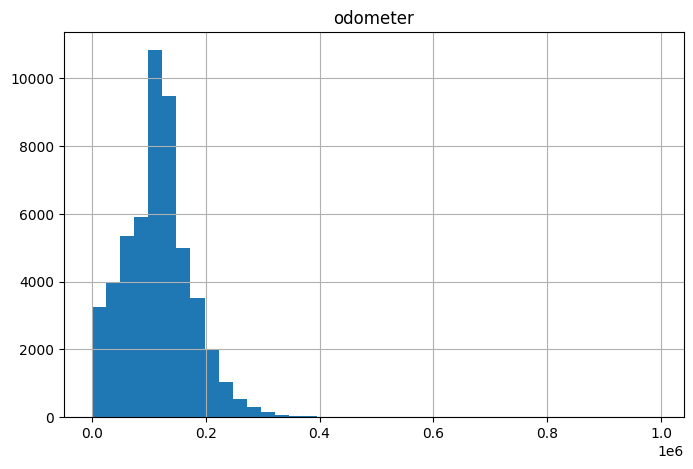

In [24]:
# Analysis of vehicle mileage when the advertisement was published
print(car_sale['odometer'].describe())
print()
print('Maximum mileage:', car_sale['odometer'].max())
print('Minimum mileage:', car_sale['odometer'].min())
print('Average mileage:', car_sale['odometer'].mean())
print('Average mileage:', car_sale['odometer'].median())
car_sale.hist('odometer', bins=40, range=(0, 990000), figsize=(8,5))


This `odometer` column has values ​​from '0' (zero) to '990000' (nine hundred and ninety thousand) kilometers driven at the time of publication of the advertisement.

This data is plausible, even with the average of 115553 and the median of 113000, since newly manufactured cars and old cars have a market for sale.

count    51525.000000
mean         6.121067
std          1.657457
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Maximum number of cylinders: 12
Minimum number of cylinders: 3
Average number of cylinders: 6.12106744298884
Median number of cylinders: 6.0


array([[<Axes: title={'center': 'cylinders'}>]], dtype=object)

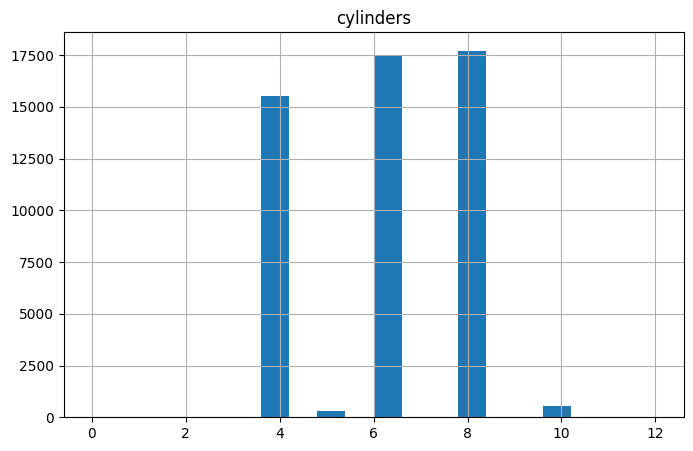

In [25]:
# Analysis of the number of cylinders
print(car_sale['cylinders'].describe())
print()
print('Maximum number of cylinders:', car_sale['cylinders'].max())
print('Minimum number of cylinders:', car_sale['cylinders'].min())
print('Average number of cylinders:', car_sale['cylinders'].mean())
print('Median number of cylinders:', car_sale['cylinders'].median())
car_sale.hist('cylinders', bins=20, range=(0, 12), figsize=(8,5))



The number of cylinders varies between 3 and 12 in the cars present in this database. No adjustment or change is necessary in this type of information.

count    51525.000000
mean         2.608578
std          0.794064
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

Better condition of vehicles: 5
Worst condition of vehicles: 0
Average vehicle condition: 2.608578360019408
Average condition of vehicles: 3.0


array([[<Axes: title={'center': 'condition'}>]], dtype=object)

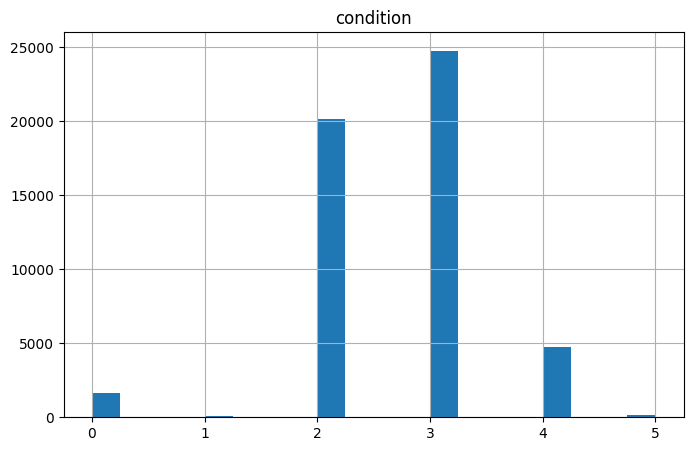

In [26]:
# Vehicle condition analysis
print(car_sale['condition'].describe())
print()
print('Better condition of vehicles:', car_sale['condition'].max())
print('Worst condition of vehicles:', car_sale['condition'].min())
print('Average vehicle condition:', car_sale['condition'].mean())
print('Average condition of vehicles:', car_sale['condition'].median())
car_sale.hist('condition', bins=20, range=(0, 5), figsize=(8,5))


We have all sorts of conditions in this database. These will vary depending on how the owners have cared for their vehicles and will likely have a direct impact on their value. No adjustments are necessary.

## Study and Precaution with atypical values

Studying outliers in the `price` column.

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

First quartile: 5000.0
Third quartile: 16839.0
Lower limit for outliers: -12758.5


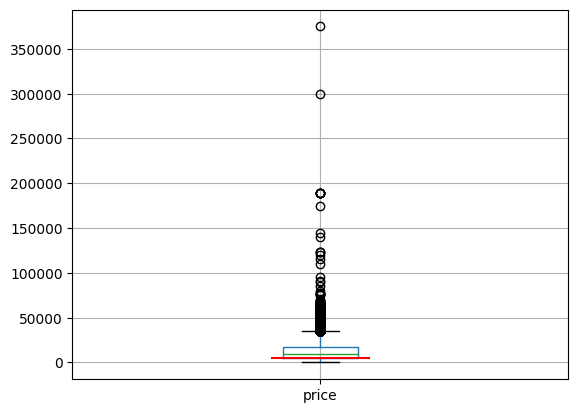

In [27]:
# Analysis to determine the lower limit for atypical price values
print(car_sale['price'].describe())
print()

# Determining the quartiles (Q1 and Q3) of price values
Q1_price = car_sale['price'].quantile(0.25)
Q3_price = car_sale['price'].quantile(0.75)

# Determining the lower bound for price outliers
IQR_price = Q3_price - Q1_price
lower_limit_outliers = Q1_price - 1.5*IQR_price

print('First quartile:', Q1_price)
print('Third quartile:', Q3_price)
print('Lower limit for outliers:', lower_limit_outliers)

car_sale.boxplot('price')
plt.hlines(y=Q1_price, xmin=0.9, xmax=1.1, color='red')


As the lower limit of the atypical values ​​of the price column gave a negative value of -12758.5, we will determine that our limit will be in the first quartile which is 5000. Data below this limit will be disregarded, because as previously stated, cars are high added value products, and values ​​of '1', '200', '1000' are not consistent. And this will be the established price limit for data analysis.

Third quartile: 16839.0
Upper limit for outliers: 34597.5


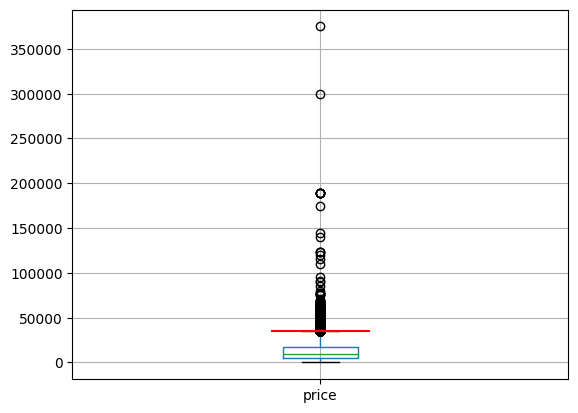

In [28]:
# Analysis of the upper limit for outliers in prices.
Q3_price = car_sale['price'].quantile(0.75)
print('Third quartile:', Q3_price)

IQR_price = Q3_price - Q1_price
upper_limit_outliers = Q3_price + 1.5*IQR_price

print('Upper limit for outliers:', upper_limit_outliers)

car_sale.boxplot('price')
plt.hlines(y=(upper_limit_outliers), xmin=0.9, xmax=1.1, color='red')



Several values ​​above the upper limit for atypical price values ​​are observed. This is 34597.5 and will be our upper cut-off line to continue with the analysis.

<class 'pandas.core.frame.DataFrame'>
Index: 36646 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         36646 non-null  int64         
 1   model_year    36646 non-null  int64         
 2   model         36646 non-null  object        
 3   condition     36646 non-null  int64         
 4   cylinders     36646 non-null  int64         
 5   fuel          36646 non-null  object        
 6   odometer      36646 non-null  int64         
 7   transmission  36646 non-null  object        
 8   type          36646 non-null  object        
 9   paint_color   36646 non-null  object        
 10  is_4wd        36646 non-null  int64         
 11  date_posted   36646 non-null  datetime64[ns]
 12  days_listed   36646 non-null  int64         
 13  year_posted   36646 non-null  int32         
 14  month_posted  36646 non-null  int32         
 15  day_posted    36646 non-null  int32      

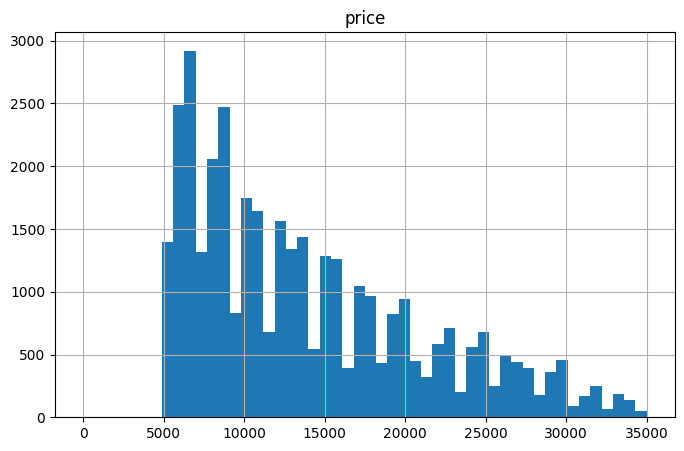

In [29]:
# Storing the data without the price outliers in a separate DataFrame
car_sale_new = car_sale.query('@Q1_price < price < @upper_limit_outliers')

# Checking how the new price histogram looks
car_sale_new.hist('price', bins=50, range=(0, 35000), figsize=(8,5))

car_sale_new.info()

Studying outliers from the `odometer` column.

       model_year  odometer
352          2009         0
1375         2007         0
1970         2000         0
2049         1969         0
2077         2010         0
...           ...       ...
48816        2000         0
48817        2013         0
48980        2004         0
49043        2011         0
50412        2008         0

[134 rows x 2 columns]

model_year
2015    16
2010    13
2011    13
2014    13
2017    12
2008    11
2002     8
2016     7
2009     6
2013     5
2005     5
2006     4
2000     4
2004     3
2003     3
2018     2
2007     2
2012     2
1991     1
1962     1
1966     1
1969     1
1968     1
Name: count, dtype: int64

134


<Axes: >

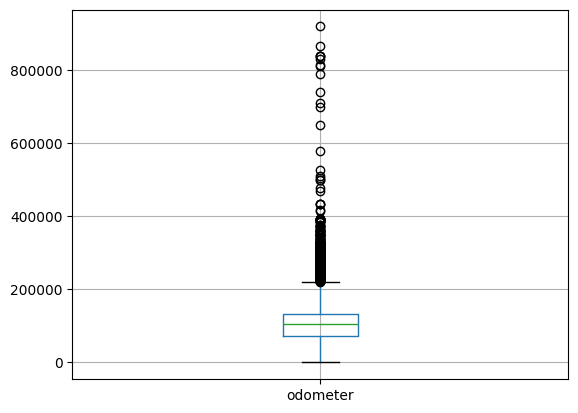

In [30]:
# Studying mileage outliers.
df_odometer = car_sale_new[car_sale_new['odometer']==0]
print(df_odometer[['model_year', 'odometer']])
print()
print(df_odometer['model_year'].value_counts())
print()
print(df_odometer['odometer'].count())

car_sale_new.boxplot('odometer')

There are 134 mileage values ​​observed as 0 (zero) and many of these cars have been in production for several years. These vehicles will be excluded from the database. They may be special cars, but we have no way of knowing and there are only 134.

In [31]:
# Storing the data without the mileage outliers in the new DataFrame
car_sale_new = car_sale_new.query('odometer != 0')

# Checking
car_sale_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36512 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         36512 non-null  int64         
 1   model_year    36512 non-null  int64         
 2   model         36512 non-null  object        
 3   condition     36512 non-null  int64         
 4   cylinders     36512 non-null  int64         
 5   fuel          36512 non-null  object        
 6   odometer      36512 non-null  int64         
 7   transmission  36512 non-null  object        
 8   type          36512 non-null  object        
 9   paint_color   36512 non-null  object        
 10  is_4wd        36512 non-null  int64         
 11  date_posted   36512 non-null  datetime64[ns]
 12  days_listed   36512 non-null  int64         
 13  year_posted   36512 non-null  int32         
 14  month_posted  36512 non-null  int32         
 15  day_posted    36512 non-null  int32      

## Study of the same parameters without the outliers

Comparing the graphs, old and new, related to `price`.

array([[<Axes: title={'center': 'price'}>]], dtype=object)

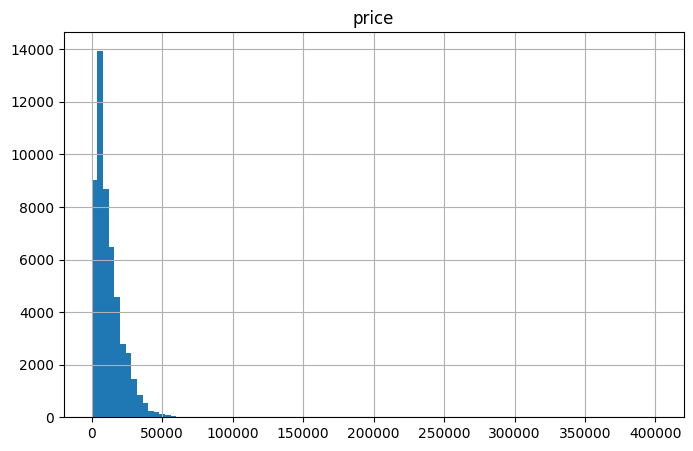

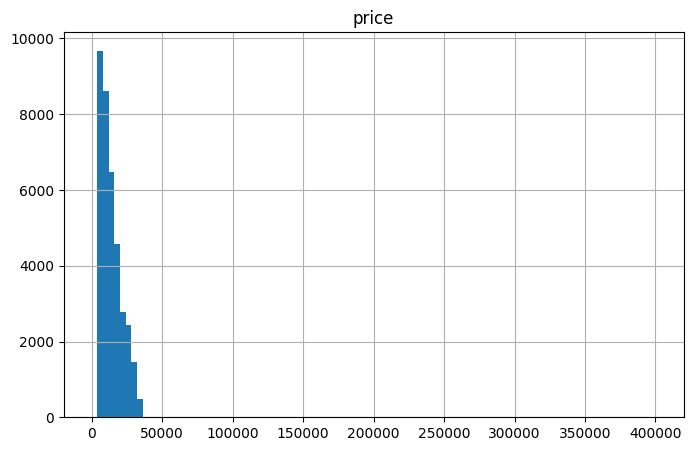

In [32]:
# Creating old price histogram
car_sale.hist('price', bins=100, range=(0, 400000), figsize=(8,5))

# Creating new price histogram
car_sale_new.hist('price', bins=100, range=(0, 400000), figsize=(8,5))

There are no longer any cars with super low prices or those with very high prices. However, the histogram still shows the behavior of more vehicles with lower values ​​and this number decreases as prices rise.

Comparing the graphs, old and new, related to the `odometer` (mileage).

array([[<Axes: title={'center': 'odometer'}>]], dtype=object)

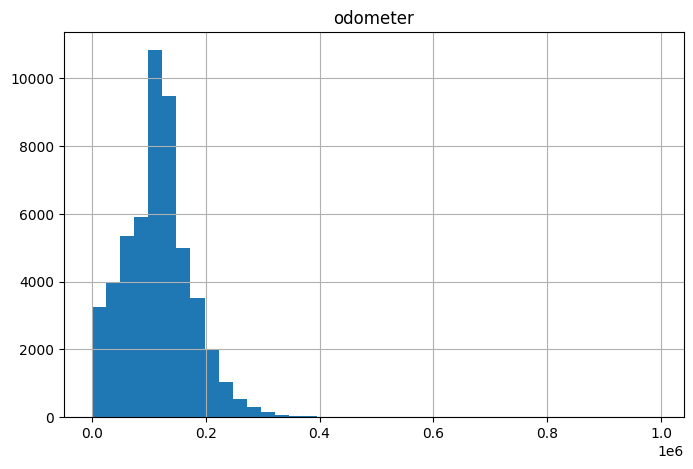

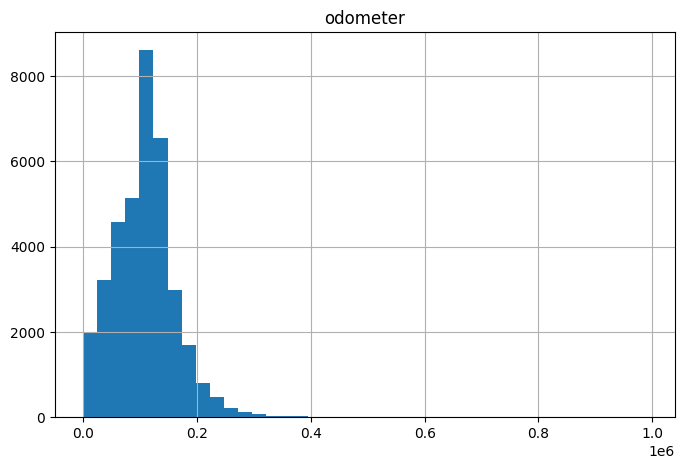

In [33]:
# Creating old mileage histogram
car_sale.hist('odometer', bins=40, range=(0, 990000), figsize=(8,5))

# Creating new mileage histogram
car_sale_new.hist('odometer', bins=40, range=(0, 990000), figsize=(8,5))

Even without the data on outliers related to price and mileage, this graph maintained its behavior. This means that the final result of the analyses will not be impacted by this removal of information.

Comparing the graphs, old and new, related to `car_age` (vehicle age).

array([[<Axes: title={'center': 'car_age'}>]], dtype=object)

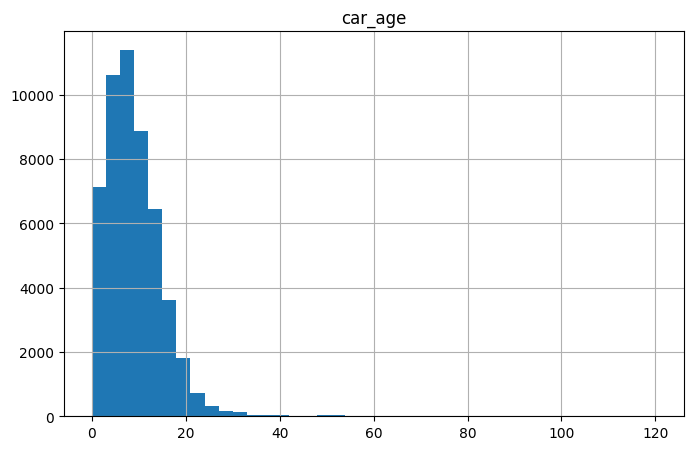

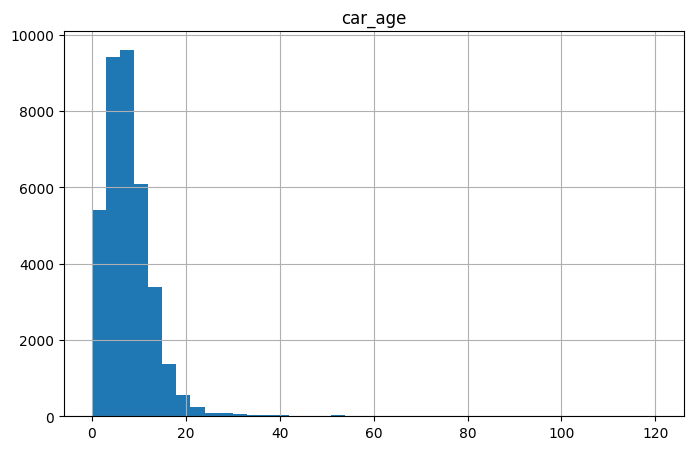

In [34]:
# Creating old vehicle age histogram
car_sale.hist('car_age', bins=40, range=(0, 120), figsize=(8,5))

# Creating new vehicle age histogram
car_sale_new.hist('car_age', bins=40, range=(0, 120), figsize=(8,5))

Even without the data on outliers related to price, the vehicle age graph maintained its behavior. This reinforces that the final result of the analyses will not be impacted by the removal of information.

Average number of days ads were shown: 39.53094872918493
Median number of days ads were shown: 33.0

count    36512.000000
mean        39.530949
std         28.268312
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Lower limit for outliers: -32.0
Upper limit for outliers: 104.0

Number of cars with long time outliers: 1159
Number of cars sold with 0 (zero) days of posting: 37
-0.0017981646882954427


<Axes: >

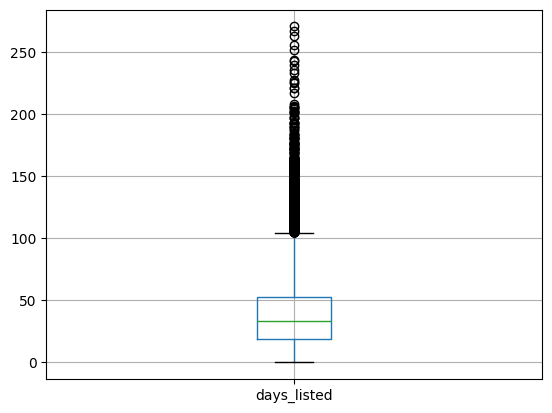

In [35]:
# Determining the mean and median of advertising days
print('Average number of days ads were shown:', car_sale_new['days_listed'].mean())
print('Median number of days ads were shown:', car_sale_new['days_listed'].median())
print()
print(car_sale_new['days_listed'].describe())
print()
Q1_days_listed = 19
Q3_days_listed = 53
IQR_days_listed = Q3_days_listed - Q1_days_listed

# Determining short and long periods of advertising days
lower_limit_outliers_days_listed = Q1_days_listed - 1.5*IQR_days_listed
upper_limit_outliers_days_listed = Q3_days_listed + 1.5*IQR_days_listed

print('Lower limit for outliers:', lower_limit_outliers_days_listed)
print('Upper limit for outliers:', upper_limit_outliers_days_listed)
print()

# Determining the number of cars that had active advertising
# for short and long periods
car_sale_up_lim_number = car_sale_new.query('days_listed > @upper_limit_outliers_days_listed')
car_sale_low_lim_number = car_sale_new.query('days_listed == 0')
print('Number of cars with long time outliers:', len(car_sale_up_lim_number['days_listed']))
print('Number of cars sold with 0 (zero) days of posting:', len(car_sale_low_lim_number['days_listed']))

# Printing correlation between price and advertising time
print(car_sale_new['price'].corr(car_sale_new['days_listed']))

# Printing box plot of advertising days
car_sale_new.boxplot('days_listed')

Advertising time has no relation to the price of vehicles.

## Average prices for each type of vehicle

We will analyze the number of advertisements and the average price for each type of vehicle. A graph will be created showing the dependence of the number of advertisements on the type of vehicle.

After this, the 2 (two) types with the highest number of advertisements will be selected for further analysis.

           type     avg_price  number_advert
10        truck  16857.722989           9848
0           SUV  12972.793302           8868
9         sedan   9466.269874           7170
8        pickup  17009.855181           5462
3         coupe  17025.416259           1636
12        wagon  11076.737477           1078
5      mini-van  10898.456338            710
4     hatchback   9121.748784            617
11          van  11299.992611            406
2   convertible  14894.194030            335
7         other  12682.717277            191
6       offroad  15178.383721            172
1           bus  20330.578947             19


<Axes: xlabel='type'>

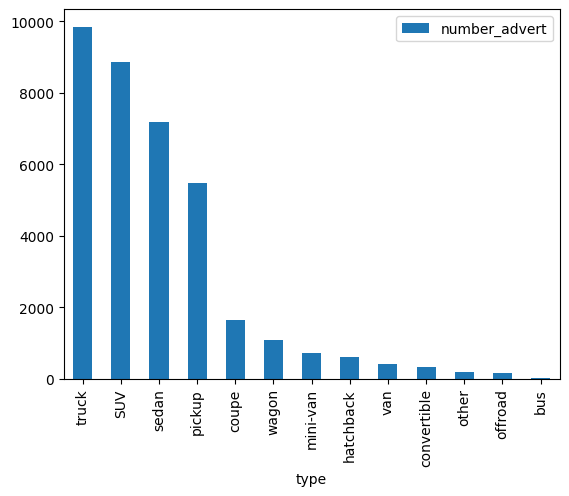

In [36]:
# Analyzing the number of advertisements and the average price for each type of vehicle
# Creating dynamic table of type po price
car_sale_new_price_type = car_sale_new.pivot_table(index='type', values='price').reset_index()

# Creating a dynamic table of the number of advertisements by vehicle type
car_sale_new_advert = car_sale_new.pivot_table(index='type', values='model', aggfunc='count').reset_index()

# Creating a column with the number of advertisements by type and price of vehicles
car_sale_new_price_type['number_advert'] = car_sale_new_advert['model']

# Renaming columns
car_sale_new_price_type.columns = ['type', 'avg_price', 'number_advert']

# Printing data in descending order by the number of advertisements column
print(car_sale_new_price_type.sort_values('number_advert', ascending=False))

# Printing graph of number of advertisements by vehicle type
car_sale_new_price_type.sort_values('number_advert', ascending=False)\
    .plot(x='type', y='number_advert', kind='bar')


It is observed that there are 4 large groups of vehicle types with high numbers of published advertisements. Among these, the `truck` and `SUV` stand out with the 2 (two) with the most advertisements identified.

## Price factors

The 'truck' and 'SUV' types of vehicles were detected as the most popular in the generated advertisements. An analysis of the factors that impact the prices of these 2 (two) types of vehicles will be carried out.

The following will be considered:
- age of the vehicle
- mileage
- condition
- type of transmission
- color

Only categorical variables with more than 50 advertisements will be evaluated, and therefore, we may end up grouping some categories into 'others'/'outros' for better verification.

In [37]:
# Slicing only the most popular cars in the system (truck and SUV)
car_sale_truck_suv = car_sale_new.query('type == "truck" or type == "SUV"')

# Checking
print(car_sale_truck_suv['type'].unique())
print()
display(car_sale_truck_suv.head())

['SUV' 'truck']



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,car_age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2018,6,23,7,20714.285714
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,1,2019-01-07,68,2019,1,7,6,18245.500000
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,unknown,1,2018-07-16,19,2018,7,16,6,17362.333333
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17,2019,2,15,11,13381.000000
14,12990,2009,gmc yukon,3,8,gas,132285,automatic,SUV,black,1,2019-01-31,24,2019,1,31,10,13228.500000


The categories 'orange', 'yellow' and 'purple' will be grouped into 'others' as they have low registrations and the third category has less than 50 advertisements.

In [38]:
# Printing the category values ​​of the 'paint_color' column
print(car_sale_truck_suv['paint_color'].value_counts())
print()

# Combining the categories 'orange', 'yellow' and 'purple' into 'others'
# which are the ones with the lowest incidence of advertisements.
car_sale_truck_suv['paint_color'] = car_sale_truck_suv['paint_color']\
    .where(car_sale_truck_suv['paint_color'] != 'orange', 'others')

car_sale_truck_suv['paint_color'] = car_sale_truck_suv['paint_color']\
    .where(car_sale_truck_suv['paint_color'] != 'yellow', 'others')

car_sale_truck_suv['paint_color'] = car_sale_truck_suv['paint_color']\
    .where(car_sale_truck_suv['paint_color'] != 'purple', 'others')


#Verificando se ocorreu tudo certo.
print(car_sale_truck_suv['paint_color'].value_counts())                                                                                  

paint_color
white      4490
unknown    3333
black      2909
silver     1976
grey       1617
blue       1431
red        1409
custom      468
green       428
brown       421
orange      107
yellow       98
purple       29
Name: count, dtype: int64

paint_color
white      4490
unknown    3333
black      2909
silver     1976
grey       1617
blue       1431
red        1409
custom      468
green       428
brown       421
others      234
Name: count, dtype: int64


/var/folders/rr/n601010568s5rqkdm8h9xdtr0000gp/T/ipykernel_3570/2579708298.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_sale_truck_suv['paint_color'] = car_sale_truck_suv['paint_color']\
/var/folders/rr/n601010568s5rqkdm8h9xdtr0000gp/T/ipykernel_3570/2579708298.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_sale_truck_suv['paint_color'] = car_sale_truck_suv['paint_color']\
/var/folders/rr/n601010568s5rqkdm8h9xdtr0000gp/T/ipykernel_3570/2579708298.py:13: SettingWithCopyWarning: 
A value 

Construction of extreme and quartile graphs for the `transmission` column for car types such as `truck` and `SUV`.

transmission
automatic    17892
manual         676
other          148
Name: count, dtype: int64


<Axes: title={'center': 'price'}, xlabel='transmission'>

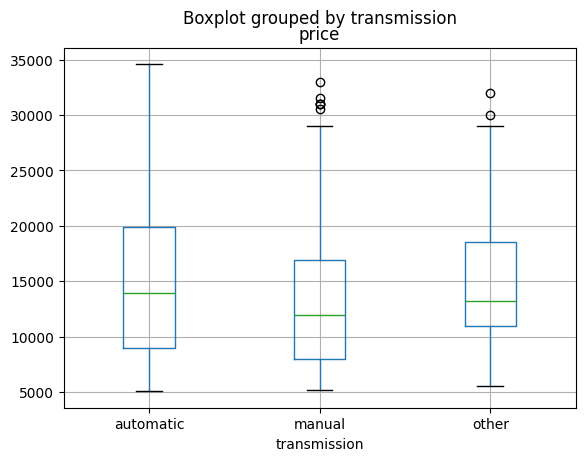

In [39]:
# Checking the number of advertisements per category
print(car_sale_truck_suv['transmission'].value_counts())

# Graph of transmission extremes and quartiles
car_sale_truck_suv.boxplot(column='price', by= 'transmission')

Construction of graphs of extremes and quartiles of the `paintcolor` column for car types such as `truck` and `SUV`.

paint_color
white      4490
unknown    3333
black      2909
silver     1976
grey       1617
blue       1431
red        1409
custom      468
green       428
brown       421
others      234
Name: count, dtype: int64


<Axes: title={'center': 'price'}, xlabel='paint_color'>

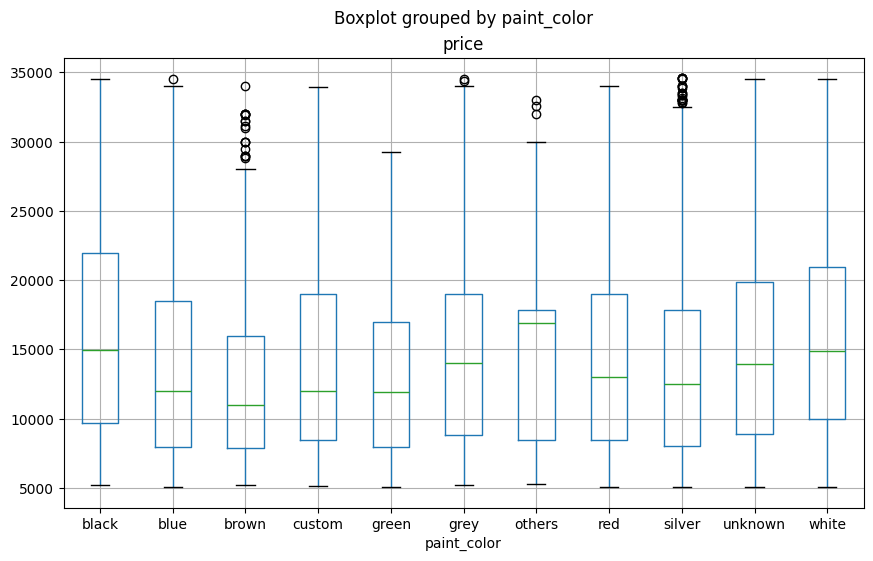

In [40]:
# Checking the number of advertisements per category
print(car_sale_truck_suv['paint_color'].value_counts())

# Graph of extremes and quartiles of vehicle colors
car_sale_truck_suv.boxplot(column='price', by='paint_color', figsize=(10,6))

Construction of scatter plots for age, mileage and condition of `truck` and `SUV` vehicles against prices.

              price  condition  odometer   car_age
price      1.000000   0.187070 -0.433053 -0.529487
condition  0.187070   1.000000 -0.261333 -0.184518
odometer  -0.433053  -0.261333  1.000000  0.428887
car_age   -0.529487  -0.184518  0.428887  1.000000

[[<Axes: xlabel='price', ylabel='price'>
  <Axes: xlabel='condition', ylabel='price'>
  <Axes: xlabel='odometer', ylabel='price'>
  <Axes: xlabel='car_age', ylabel='price'>]
 [<Axes: xlabel='price', ylabel='condition'>
  <Axes: xlabel='condition', ylabel='condition'>
  <Axes: xlabel='odometer', ylabel='condition'>
  <Axes: xlabel='car_age', ylabel='condition'>]
 [<Axes: xlabel='price', ylabel='odometer'>
  <Axes: xlabel='condition', ylabel='odometer'>
  <Axes: xlabel='odometer', ylabel='odometer'>
  <Axes: xlabel='car_age', ylabel='odometer'>]
 [<Axes: xlabel='price', ylabel='car_age'>
  <Axes: xlabel='condition', ylabel='car_age'>
  <Axes: xlabel='odometer', ylabel='car_age'>
  <Axes: xlabel='car_age', ylabel='car_age'>]]


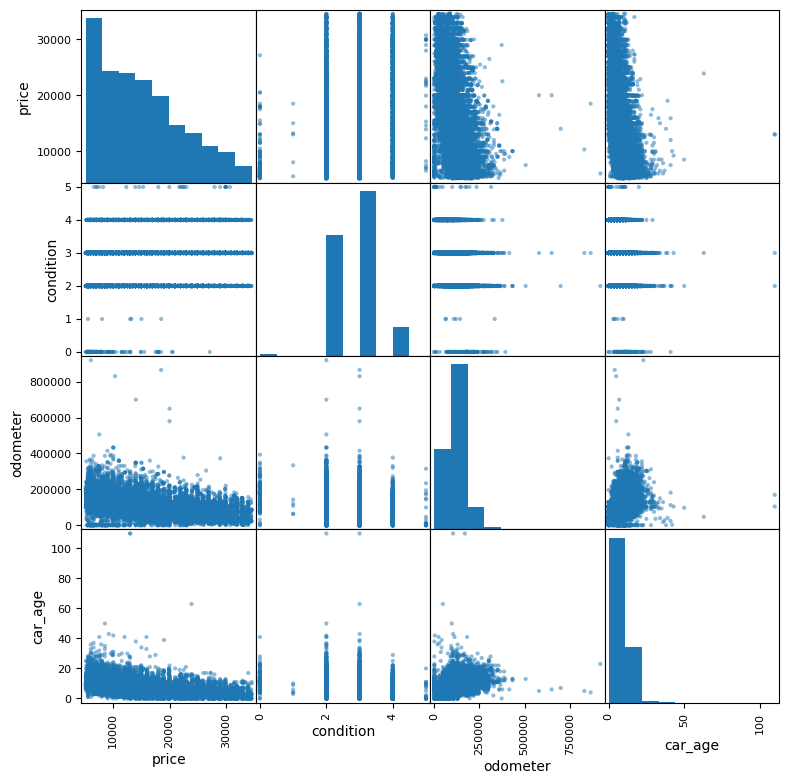

In [41]:
# Selecting columns 'price', 'condition', 'odometer', 'car_age'
columns1 = ['price', 'condition', 'odometer', 'car_age']
car_sale_truck_suv_disp = car_sale_truck_suv[columns1]

# Correlation matrix and graphs between price, condition, mileage and age
print(car_sale_truck_suv_disp.corr())
print()
print(pd.plotting.scatter_matrix(car_sale_truck_suv_disp, figsize=(9, 9)))

## **Final Conclusions**

After the analyses, we can reach some conclusions.

**Advertising Time x Price**: There is no relationship between advertising time and vehicle prices. These do not have a significant correlation.

**Vehicle Type x Number of Advertisements**: The types of vehicles that have the highest number of advertisements are trucks and SUVs.

### **Factors that influence truck and SUV prices**

**Price x Vehicle Condition**: There is a slight correlation between vehicle condition and prices. As the condition improves, the price increases. However, this correlation is not very significant, with a Pearson coefficient of 0.18.

**Price x Mileage**: As the mileage decreases, vehicle prices increase. These parameters are directly linked, with a Pearson coefficient of -0.45.

**Price x Age of Vehicle**: The newer the car, the higher its value. These parameters are directly linked and have a Pearson coefficient of -0.55.